In [1]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
# Load dataset
df = pd.read_csv('salary_Data.csv')  # Make sure this file is in your working directory

# Display basic info
print(df.head())
print("\nDataset Summary:\n", df.describe())
print("\nNull values:\n", df.isnull().sum())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  

Dataset Summary:
               Age  Years of Experience         Salary
count  373.000000           373.000000     373.000000
mean    37.431635            10.030831  100577.345845
std      7.069073             6.557007   48240.013482
min     23.000000             0.000000     350.000000
25%     31.000000             4.000000   55000.000000
50%     36.000000             9.000000   95000.000000
75%     44.000000            15.000000  140000.000000
max     53.000

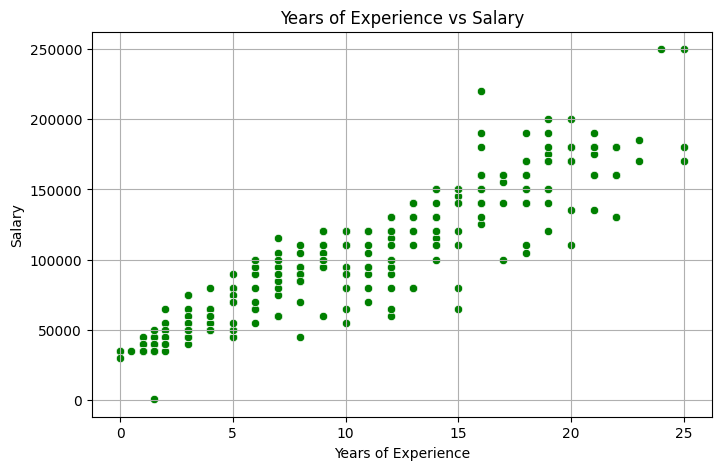

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Years of Experience', y='Salary', data=df, color='green')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()



In [9]:
# Fill missing values in 'Years of Experience' with the column mean
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())  # Optional if salary also has NaN

# Now split and continue
X = df[['Years of Experience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 254964921.7904187
R² Score: 0.8947512075775289


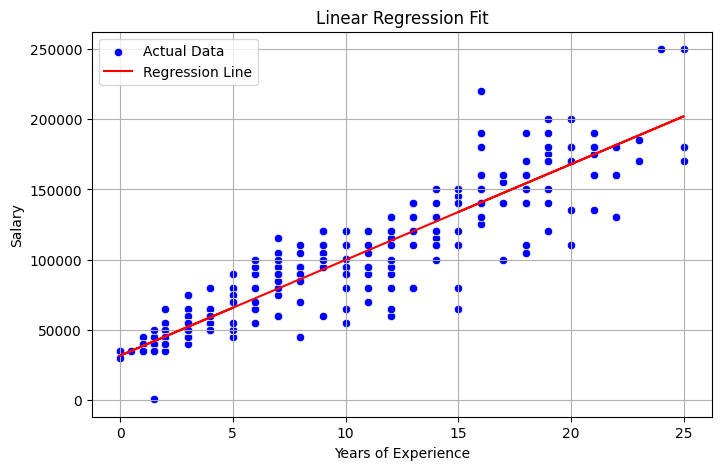

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Years of Experience', y='Salary', data=df, label='Actual Data', color='blue')
plt.plot(df['Years of Experience'], model.predict(df[['Years of Experience']]), color='red', label='Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


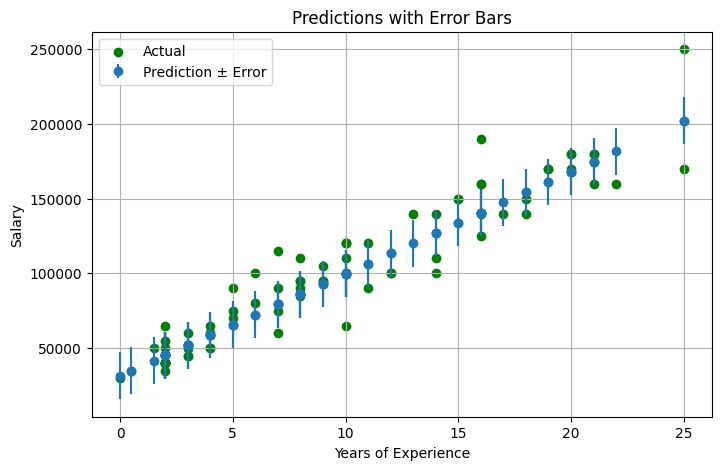

In [13]:
# Standard deviation error bars
plt.figure(figsize=(8, 5))
plt.errorbar(X_test.values.flatten(), y_pred, yerr=np.std(y_test - y_pred), fmt='o', label='Prediction ± Error')
plt.scatter(X_test, y_test, label='Actual', color='green')
plt.title('Predictions with Error Bars')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# Features and labels
X = df[['Years of Experience']]
y = df['Salary']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [16]:
def predict_salary():
    try:
        years = float(input("Enter Years of Experience: "))
        input_df = pd.DataFrame({'Years of Experience': [years]})
        prediction = model.predict(input_df)
        print(f"Predicted Salary for {years} years: ₹{prediction[0]:,.2f}")
    except:
        print("Please enter a valid number.")

predict_salary()


Predicted Salary for 10.0 years: ₹99,726.43
